<h2>MNIST Digits - Kernel Functions</h2>

1. Load the entire MNIST digit dataset: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/ "http://yann.lecun.com/exdb/mnist/"%29.

2. Choose two digit classes (e.g 7s and 3s) from the training data, and plot some of the examples.

3. Train a support vector classifier using each of the following kernels:

    - Linear
    - Poly
    - RBF
    

4. Report your training times on the dataset for the different kernels.

5. Report your error rates on the testing dataset for the different kernels.

    (If you encounter any issues with training time or memory issues, then you may use a reduced dataset, but carefully detail how you reduced the dataset.)

<h2>Part 1: Importing and Preprocessing the MNIST Data</h2>


The full MNIST digit dataset is downloaded from the following github repo: 

https://github.com/amplab/datascience-sp14/tree/master/lab7/mldata

I used the following code as reference to import the full MNIST dataset into my notebook:

https://github.com/ageron/handson-ml/issues/143#issuecomment-403342358

After processing the raw MNIST dataset (in ".mat" format), the output is a dictionary of arrays, where the keys "data" and "target" correspond to matrices of the digit images and the digit labels respectively. 

There are 70,000 digit images in the dataset, and each digit image has 784 features (corresponding to 784 pixels, i.e. 28 x 28 image size). The numbers "7" and "2" are filtered out for training and testing the SVC model in Part 2.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#import MNIST dataset
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [3]:
print(f"Size of MNIST digit dataset: {mnist['data'].shape}")

#take a peak at the MNIST dataset structure
mnist

Size of MNIST digit dataset: (70000, 784)


{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

Seven


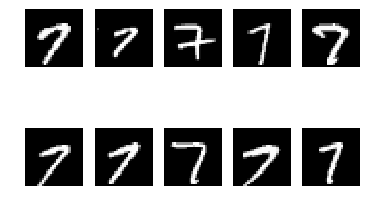

Two


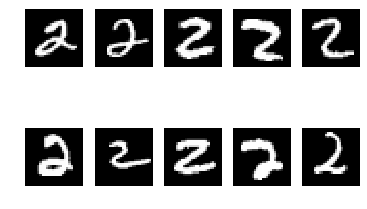

In [4]:
mnist_data, mnist_target = mnist['data'], mnist['target']

#filter out only 2 and 7 to be used for training
number_filter = np.where((mnist_target == 2 ) | (mnist_target == 7))
mnist_data, mnist_target = mnist_data[number_filter], mnist_target[number_filter]

def plot_digits(title, data):
    print(title)
    for index,image in enumerate(data[:10]):
        image = image.reshape(28,28)
        plt.subplot(2, 5, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    
plot_digits('Seven',mnist_data[np.where(mnist_target == 7)])
plot_digits('Two',mnist_data[np.where(mnist_target == 2)])
    

<h2>Part 2: Training and Testing the SVC Model</h2>

The MNIST data is split with a train-test ratio of 7:3. The training dataset has 9998 data points, while the testing dataset has 4285 data points. The support vector classifier (SVC) from sklearn's support vector machine (SVM) module is trained and tested on the dataset using different kernel functions, e.g. "linear", "poly", and "rbf". The time taken for the training and testing procedures, and the training and testing accuracy of the different models are recorded and summarized below.

In [5]:
from sklearn.model_selection import train_test_split

#split the dataset into training and testing data
X_train,X_test,y_train,y_test = train_test_split(mnist_data,mnist_target,test_size=0.3)

#check the dimensions of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9998, 784), (4285, 784), (9998,), (4285,))

In [36]:
def train_test_svm(svc, X_train, X_test, y_train, y_test, demo = False):
    '''
    Inputs: 
    - svc: Initialized svc instance.
    - demo: Boolean. If set to True, will print out outputs when running.
    
    Outputs: 
    - train_time: CPU processing training time (s)
    - test_time: CPU processing testing time (s)
    - train_score: Model score on the training data
    - test_score: Model score on the testing data
    '''
    
    #train model
    train_start = time.process_time()
    
    model = svc.fit(X_train, y_train) 
    
    train_stop = time.process_time()
    
    #test model
    test_start = time.process_time()
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    test_stop = time.process_time()
    
    #get train time and test time
    train_time = train_stop - train_start
    test_time = test_stop - test_start
    
    if demo:
        print(f'Train time')
        print(f'CPU process time: {round(train_time,4)} s')

        print(f'\nTest time')
        print(f'CPU process time: {round(test_time,4)} s')

        print(f'Model score: {round(test_score,4)}')
        
    return train_time, test_time, train_score, test_score

In [37]:
from sklearn.svm import SVC

kernels = ['linear','poly','rbf']

#create empty numpy array to store results
results = np.zeros([len(kernels),5])

#train and test SVCs with different kernels on MNIST data (2s and 7s)
for i in range(len(kernels)):
    
    #initiate the SVC classifier
    svc = SVC(kernel=kernels[i])
    
    #get the time taken for training & testing, and the model score
    train_time, test_time, train_score, test_score = train_test_svm(svc, X_train, X_test, y_train, y_test)
    
    #store results
    results[i,:] = i, round(train_time,4), round(test_time,4), round(train_score,4), round(test_score,4)


In [38]:
df = pd.DataFrame(results, 
                  columns=['Kernels',
                           'Training CPU Processing Time (s)',
                           'Testing CPU Processing Time (s)',
                           'Training score',
                           'Testing score'])
df['Kernels'] = kernels
df

,Kernels,Training CPU Processing Time (s),Testing CPU Processing Time (s),Training score,Testing score
0,linear,5.7346,3.8400,1.0,0.9755
1,poly,4.5878,5.9877,1.0,0.9937
2,rbf,148.0907,105.1719,1.0,0.5001


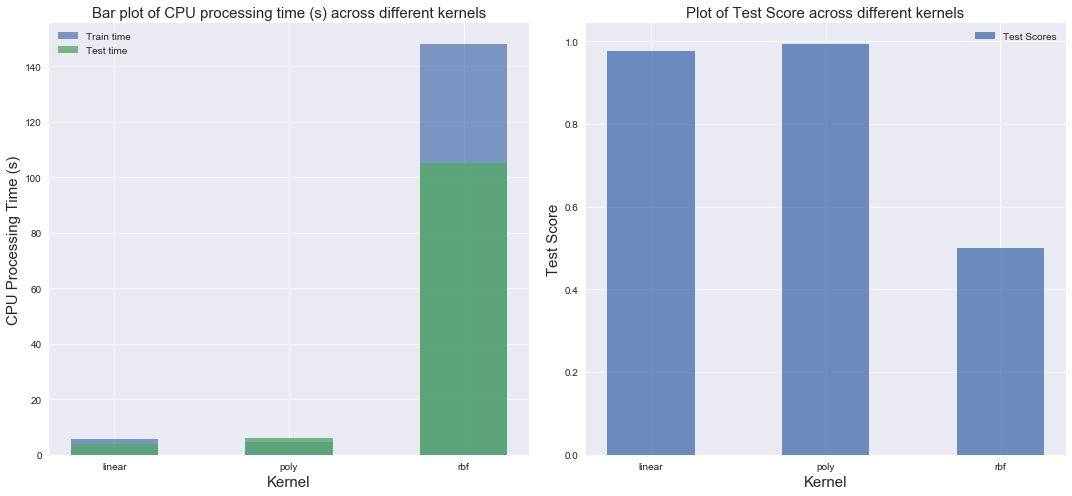

In [39]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.bar(df['Kernels'], df['Training CPU Processing Time (s)'], label='Train time', alpha=0.7, width=0.5)
plt.bar(df['Kernels'], df['Testing CPU Processing Time (s)'], label='Test time', alpha=0.8, width=0.5)
plt.xlabel('Kernel', size=15)
plt.ylabel('CPU Processing Time (s)', size=15)
plt.title('Bar plot of CPU processing time (s) across different kernels', size=15)
plt.legend()

plt.subplot(1,2,2)
plt.bar(df['Kernels'], df['Testing score'], label='Test Scores', alpha=0.8, width=0.5)
plt.xlabel('Kernel', size=15)
plt.ylabel('Test Score', size=15)
plt.title('Plot of Test Score across different kernels', size=15)
plt.legend()
plt.tight_layout()
plt.show()

<h2>Summary</h2>

The results show that the the linear kernel had the fastest testing time (3.84 s) on 4285 data points, while the polynomial kernel had the fastest training time (4.58 s) on 9998 data points. Since the difference between the linear and polynomial training and testing times are small (1-2 seconds), we can assume that the linear and polynomial kernels had roughly the same time for both training and testing. The polynomial kernel has the best performance with a score of 0.99, followed by the linear kernel with a score of 0.97.

The radial basis function (rbf) kernel has the longest training and testing times (148 s and 105 s), which are roughly 30 times larger than the linear and polynomial kernels' training and testing times. The rbf kernel also the worst performance. While all the kernels exhibit a training score of 1.0, the rbf kernel has a surprisingly low test score of 0.50. This suggests that the rbf kernel svc is probably overfitting on the training data, thus causing the model to have high variance, and exhibiting poor performance on the testing data. This makes sense considering that the rbf kernel is using a more complex transformation function then the linear and polynomial kernels.